<br>
<h2 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color:#2ab7ca; color :  #fed766 ; text-align: center; border-radius: 5px 5px; padding: 5px"> California Housing Prices Prediction</h2> 
<br>
<div class = 'image'> <img style="float:center; width:65%" align=center src =
https://github.com/azaruddinaskarali/Median-Housing-Prices-Detection/blob/main/California_pic.jpg?raw=true> 
</div>
<br>
<br>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

## Importing the required Libraries

In [2]:


import pandas as pd

import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

import scipy.stats as stats

### Opening and reading the CSV file in pandas.

In [3]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


♦  We can clearly notice that the total_bedrooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature.

♦ We will need to take care of this later.


♦ A quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute.

♦ A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

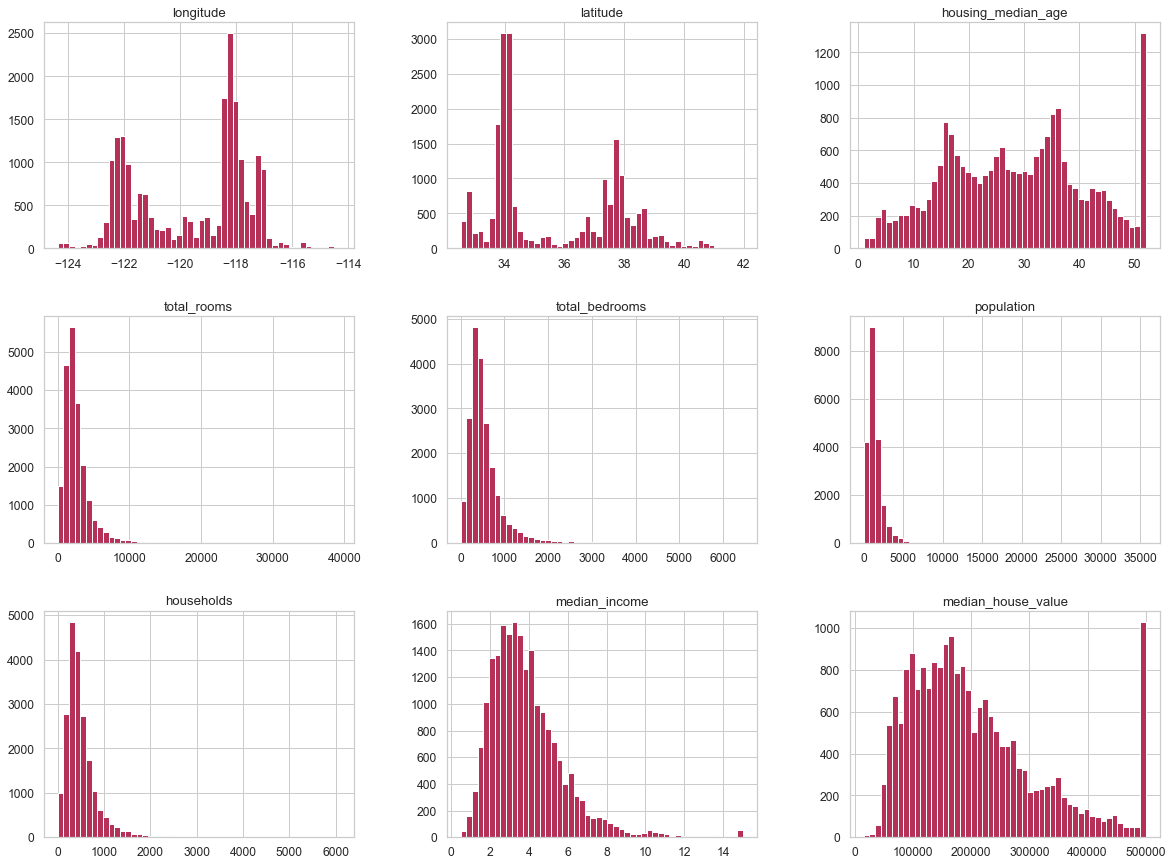

In [8]:
sns.set(style='whitegrid',  font_scale=1.1, rc={"figure.figsize": [20, 15]})
housing.hist(bins=50,color='#b53158')
plt.show()

#### Insights from the above histograms:
♦ Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

♦ The median income attribute does not look like it is expressed in US dollars (USD).

♦ Given in Problem Statement: "The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 5 actually means about $50,000)"

#### Computing Pair Wise Correlation of Columns

In [9]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


#### Correlation visualisation using heatmaps


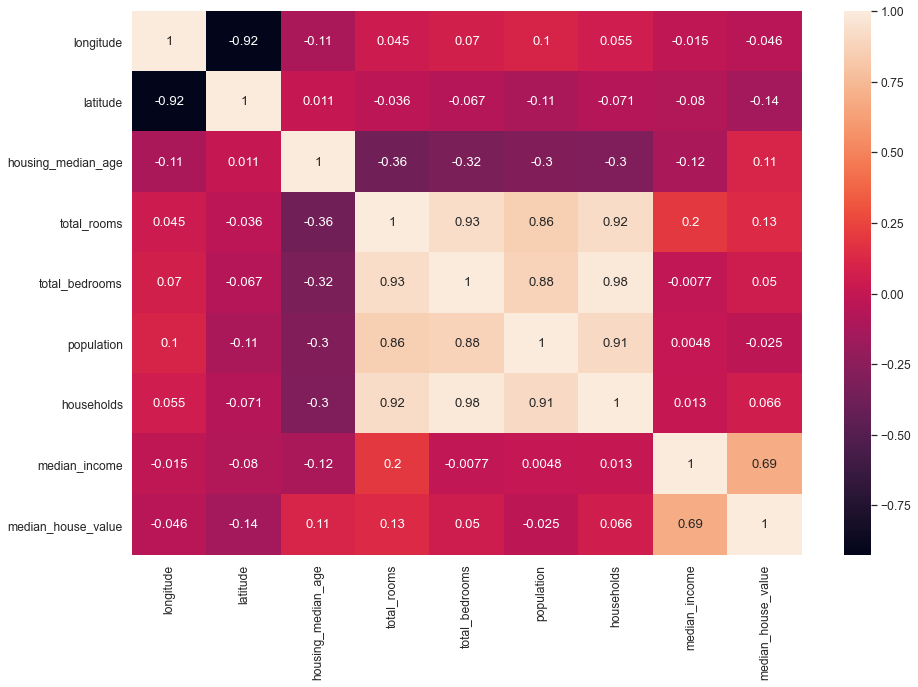

In [10]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [15, 10]})
sns.heatmap(housing.corr(), annot=True, cmap='rocket')
plt.show()

### Sorting the correlations in descending order to get the most correlated attribute with the target attribute.

In [11]:

housing.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

♦ The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot.

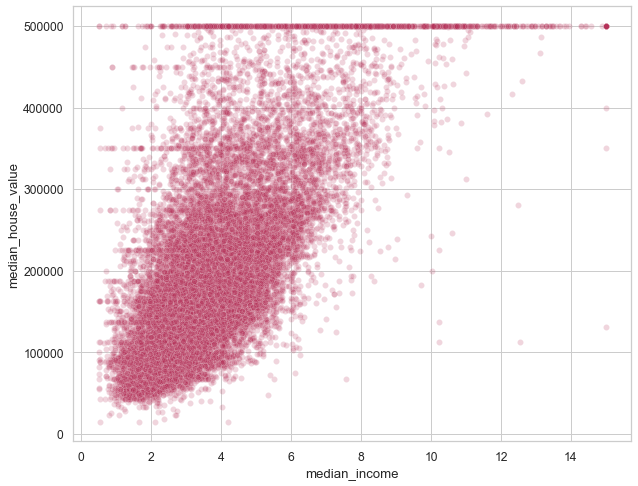

In [12]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=housing,x=housing.median_income,y=housing.median_house_value,color='#b53158',alpha=0.2)
plt.show()

♦ The above plot reveals a few things,First, the correlation is indeed very strong; We can clearly see the upward trend, and the points are not too dispersed.

♦ Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000.

### Visualizing Geographical Data
♦ Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data

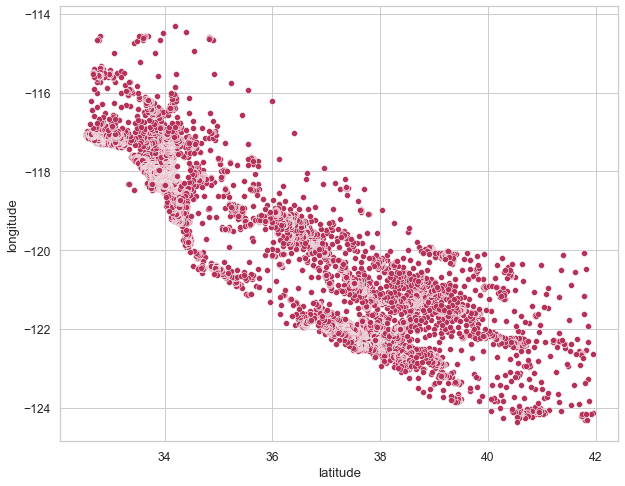

In [13]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10,8]})
sns.scatterplot(data=housing,x=housing.latitude,y=housing.longitude,color='#b53158')
plt.show()

♦ This looks like California all right, but other than that it is hard to see any particular pattern.

♦ Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.

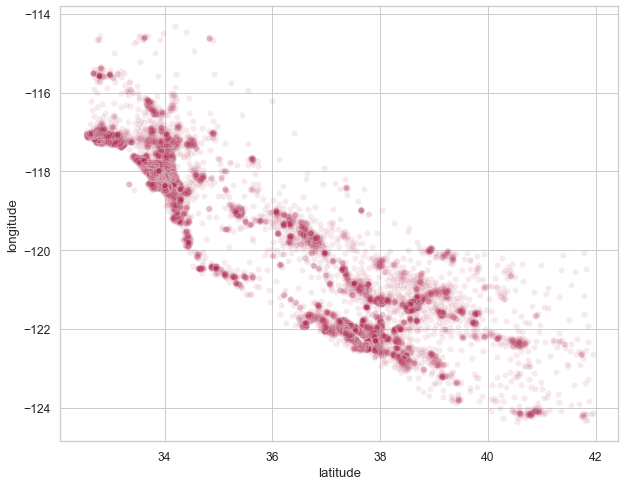

In [14]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 8]})
sns.scatterplot(data=housing,x=housing.latitude,y=housing.longitude,color='#b53158',alpha=0.1)
plt.show()

♦ One can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

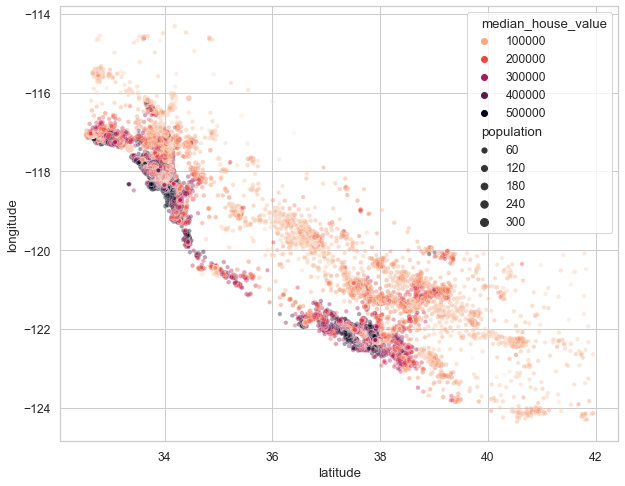

In [15]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10,8]})
sns.scatterplot(
    data=housing,
    x=housing.latitude,
    y=housing.longitude,
    alpha=0.4,
    palette='rocket_r',
    hue=housing.median_house_value,
    size=housing.population/100)
plt.show()

♦ This plot tells us that the housing prices are very much related to the location (e.g. close to the ocean) and to the population density.

## Checking for linear regression assumptions 

#### 1. Linear Relationship


♦  Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a scatter plot to check the relation of independent variables with the target variable


longitude


<Figure size 14400x1440 with 0 Axes>

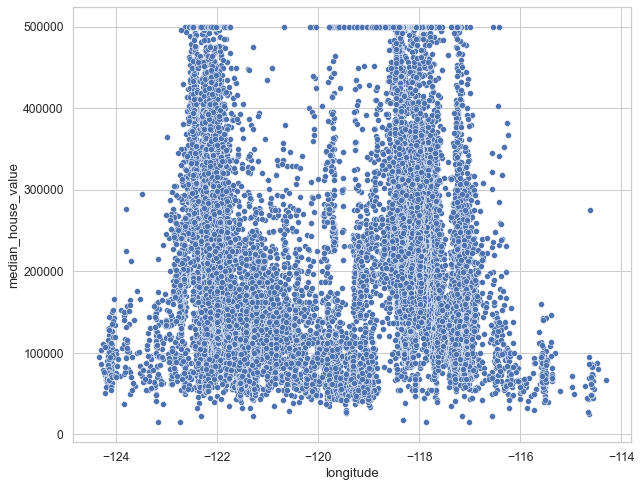

----------------------------------------
latitude


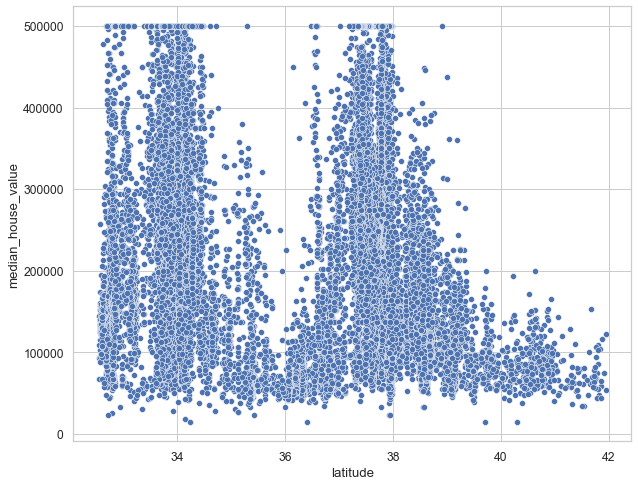

----------------------------------------
housing_median_age


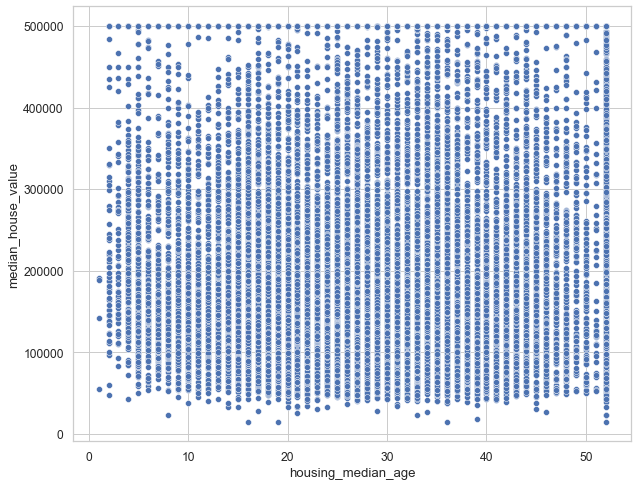

----------------------------------------
total_rooms


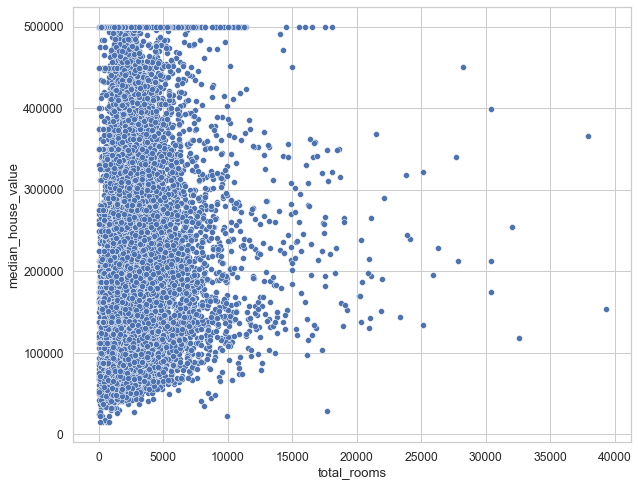

----------------------------------------
total_bedrooms


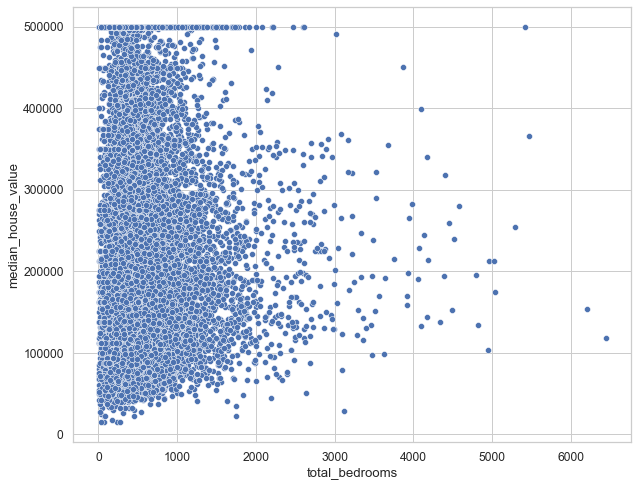

----------------------------------------
population


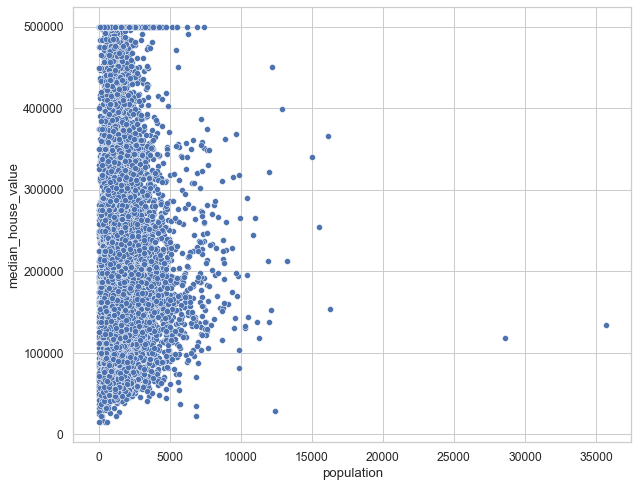

----------------------------------------
households


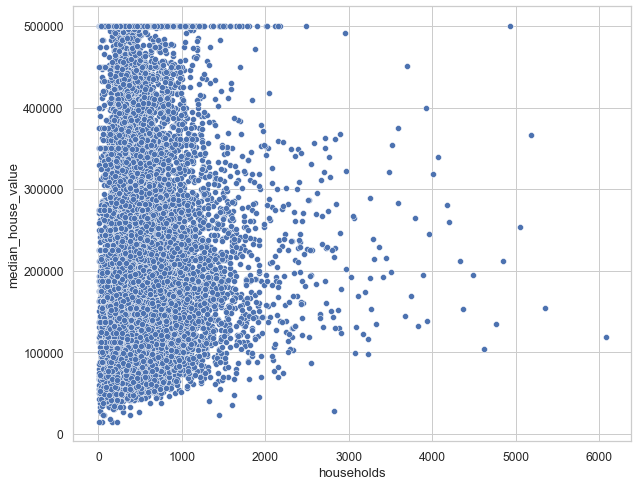

----------------------------------------
median_income


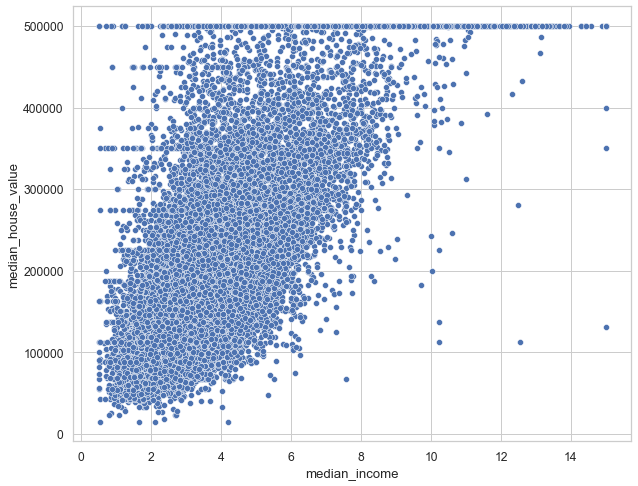

----------------------------------------
median_house_value


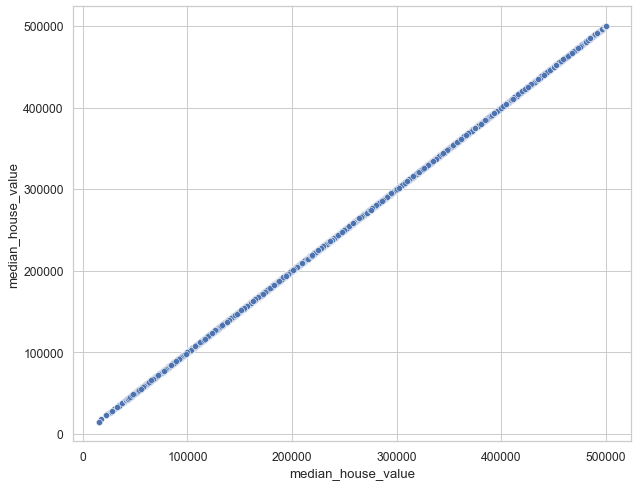

----------------------------------------
ocean_proximity


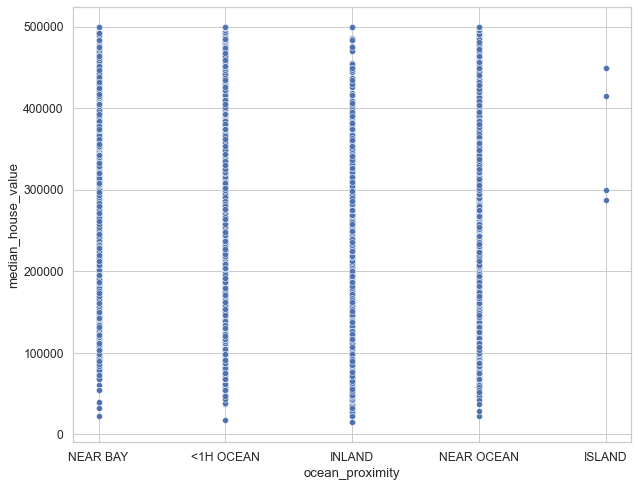

----------------------------------------


In [16]:
plt.figure(figsize=(200,20)) 
for col in housing:
    try:
        print(col)
        plt.figure()
        sns.scatterplot(data=housing,y="median_house_value",x=col)
        plt.show()
    except:
        pass
    print("----------------------------------------")


♦  By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. 

♦  So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

♦ Now rest of the assumptions require us to perform the regression before we can even check for them. 

♦ So let's perform regression on it.

#### Prepping data for checking if our data follows all  the other assumptions that is required for linear regression

In [17]:
target_col='median_house_value'

In [18]:
X = housing.loc[:, housing.columns != target_col]
y = housing.loc[:, target_col]

In [19]:
X=pd.get_dummies(X)

In [20]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
imputer.fit(X)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(X)

In [24]:
X

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [25]:
column=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN']

In [26]:
X = pd.DataFrame(X, columns =column)

In [27]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [28]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [32]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.6475444878589187


#### 2. Mean of Residuals(2nd assumption)

♦  Residuals as we know are the differences between the true value and the predicted value. 

♦ One of the assumptions of linear regression is that the mean of the residuals should be zero.

♦ So let's find out.

In [33]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -9.926887907723124e-12


Very close to zero so all good here

#### 3. Check for Homoscedasticity

♦  Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 

♦  By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

###### Detecting heteroscedasticity!



##### Graphical Method:

♦  Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). 

♦ If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

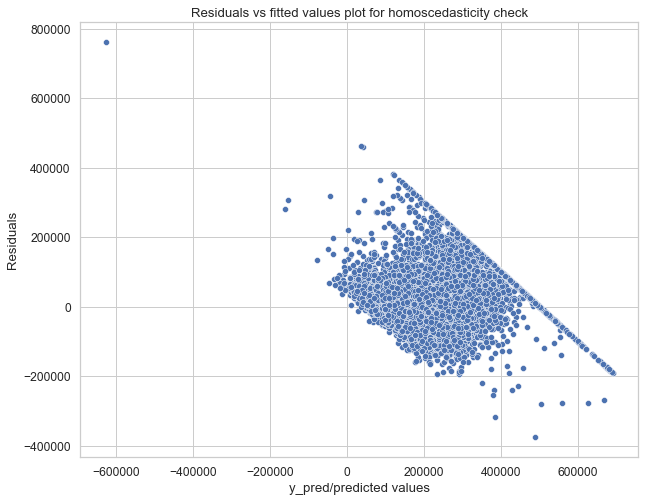

In [34]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

##### Now we will be applying tests.
♦  A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis.

♦  Remember, a researcher or data scientist would always aim to reject the null hypothesis.

##### Goldfeld Quandt Test
♦  Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic


Alternative Hypothesis: Error terms are heteroscedastic.

In [35]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9642170918898844), ('p-value', 0.9453729084686406)]

♦  Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.

##### 4. Check for Normality of error terms/residuals

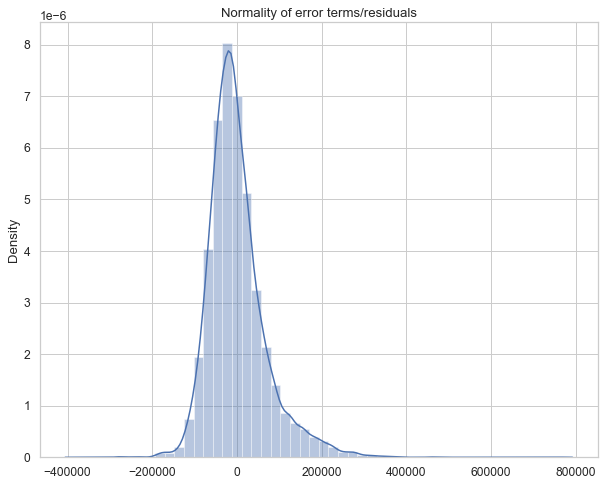

In [36]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

♦  The residual terms are pretty much normally distributed for the number of test points we took. 

♦ Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal

♦ . A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

##### 5. No autocorrelation of residuals


♦  When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. 

♦ Though it is more evident in time series data.In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays

♦ There should not be autocorrelation in the data so the error terms should not form any pattern

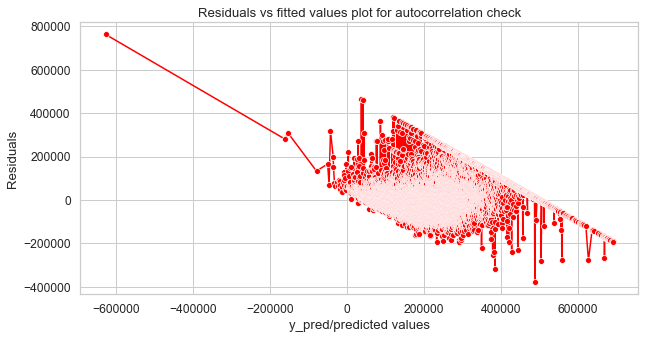

In [37]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='red')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')


p = plt.title('Residuals vs fitted values plot for autocorrelation check')

#### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
♦  Null Hypothesis: Autocorrelation is absent.

♦  Alternative Hypothesis: Autocorrelation is present.

In [38]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.27869922814449527

♦  Since p value is greater than 0.05 we accept the null hypothesis that error terms are not autocorrelated

In [39]:
import statsmodels.api as sm

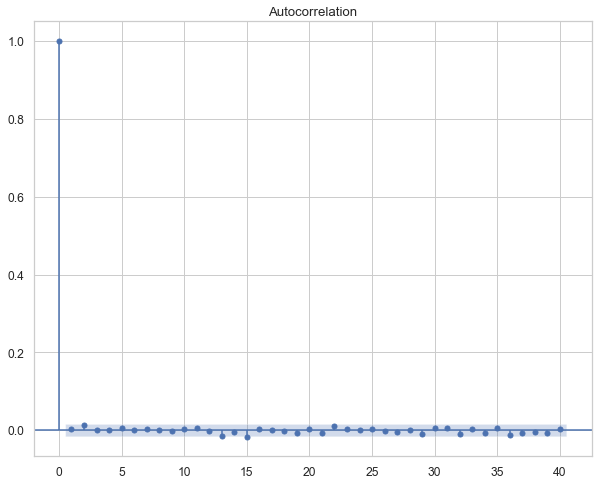

In [40]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

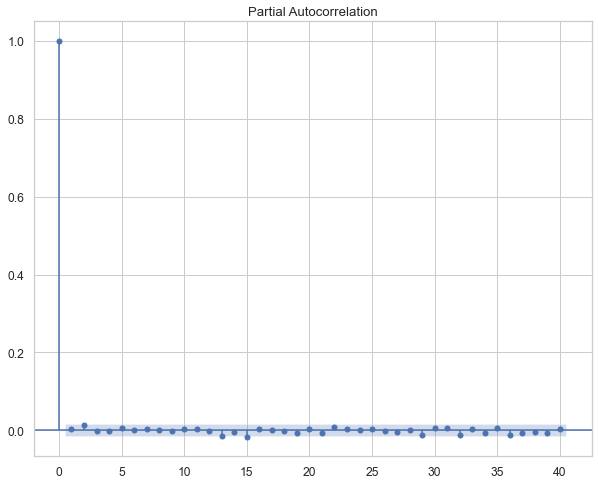

In [41]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

♦  The results show no signs of autocorelation since there are no spikes outside the blue confidence interval region. 

#### 6. No perfect multicollinearity

♦  In regression, multicollinearity refers to the extent to which independent variables are correlated. 

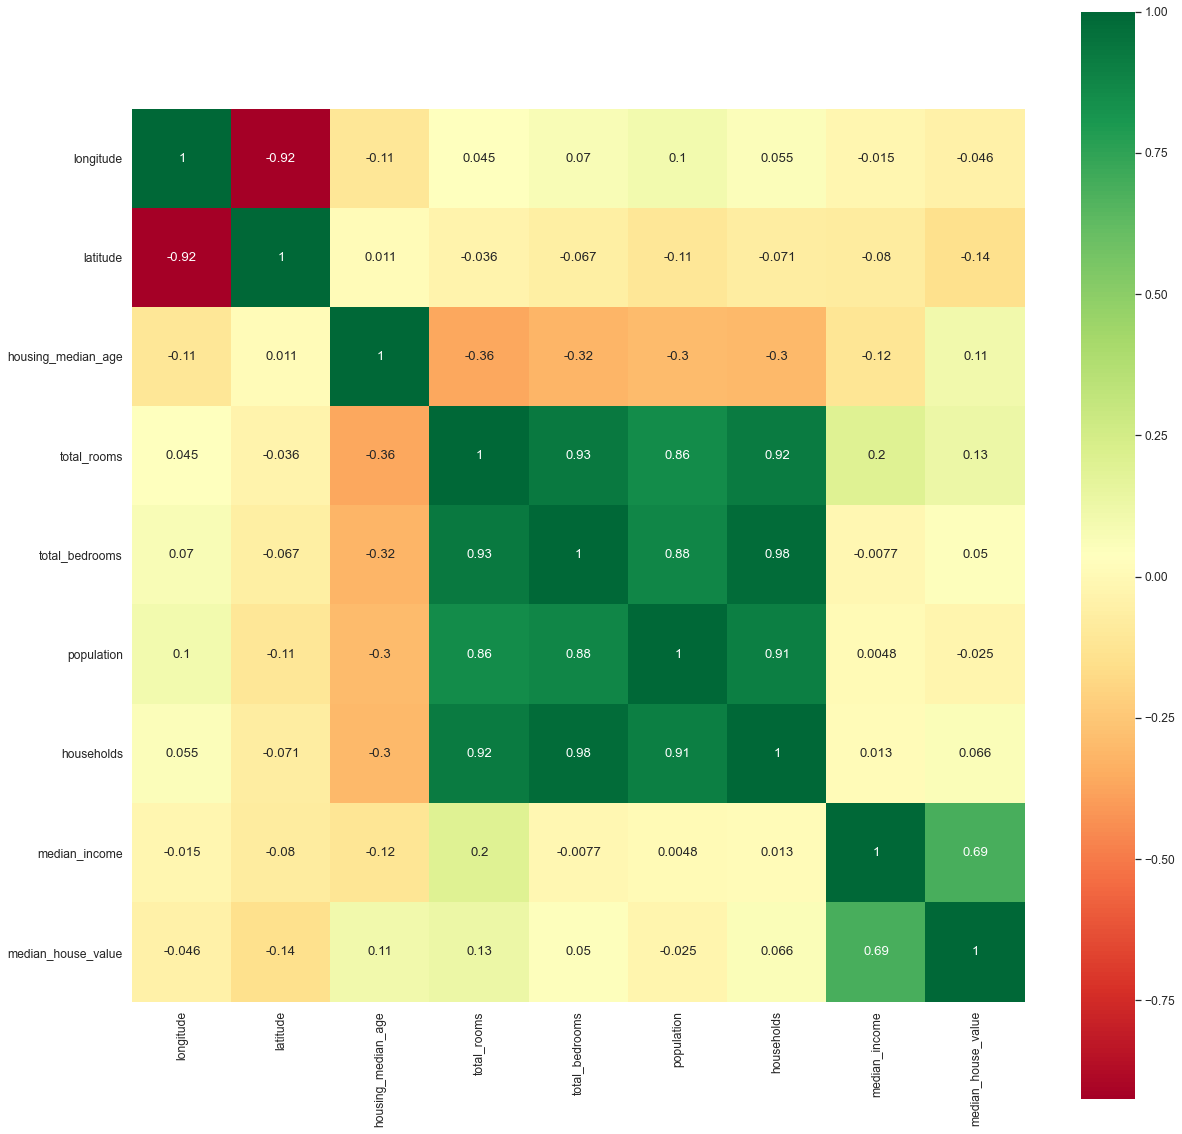

In [42]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(housing.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

#### Experimenting Attribute Combinations

Before Removing the one of correlated attributes if a pair lets try creating new attrubutes out of it 

♦ For example, the total number of rooms in a district is not very useful if we don’t know how many households there are. What we really want is the number of rooms per household.

In [43]:

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [44]:
housing.corr().sort_values(ascending=False,by='median_house_value').median_house_value

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

♦ Looking at the correlation matrix again, we see that the new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

##### Removing the one feature out of the pair of correlated features in our data

In [45]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(housing, 0.85)
len(set(corr_features))

3

In [47]:
corr_features

{'households', 'population', 'total_bedrooms'}

In [48]:
housing=housing.drop(corr_features,axis=1)

In [49]:
housing=housing.drop('total_rooms',axis=1)

In [50]:
housing

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


###### So most of the major assumptions of Linear Regression are successfully through and we can proceed


### Handling Skewness

##### Using Q-Q plot(for checking normality of our features)


In [51]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

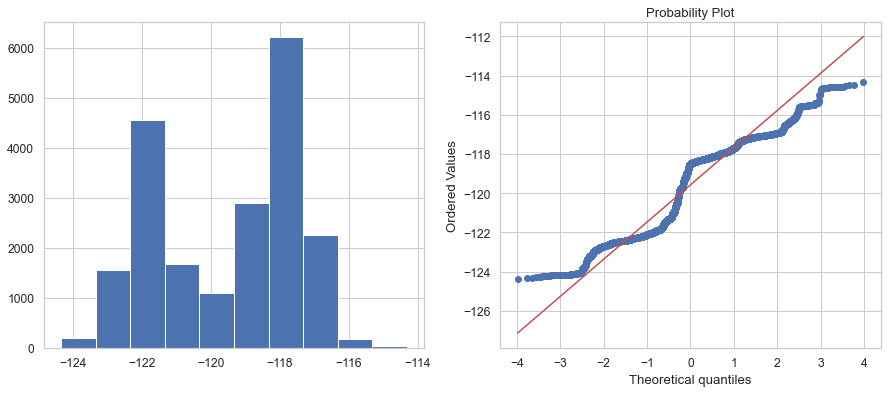

In [52]:
diagnostic_plots(housing, 'longitude')

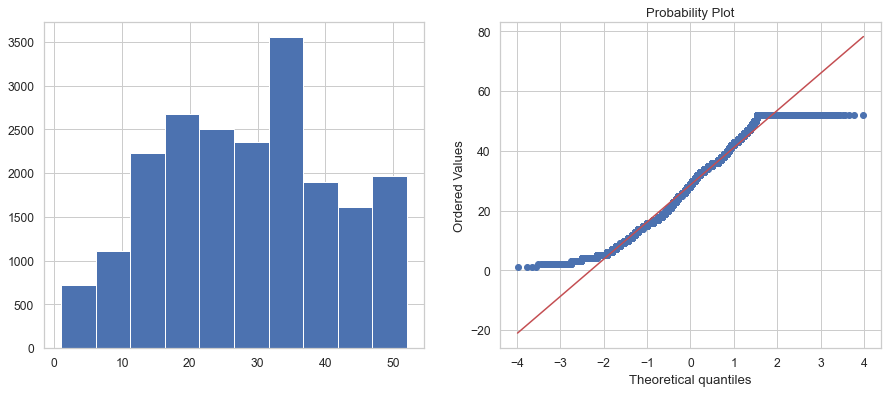

In [53]:
diagnostic_plots(housing, 'housing_median_age')

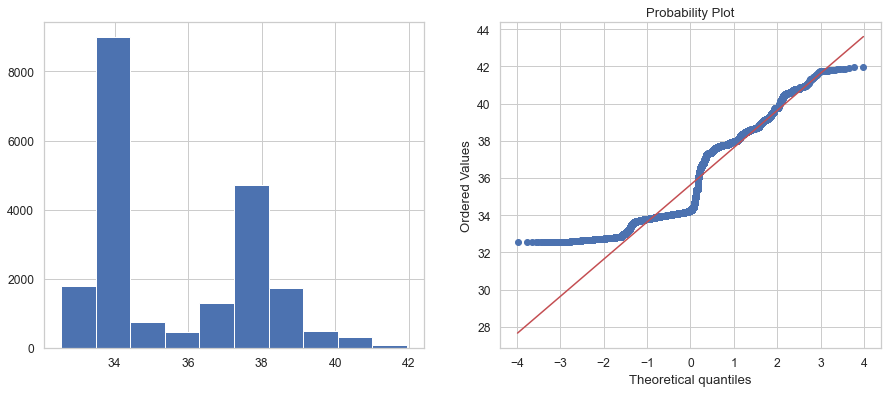

In [54]:
diagnostic_plots(housing, 'latitude')

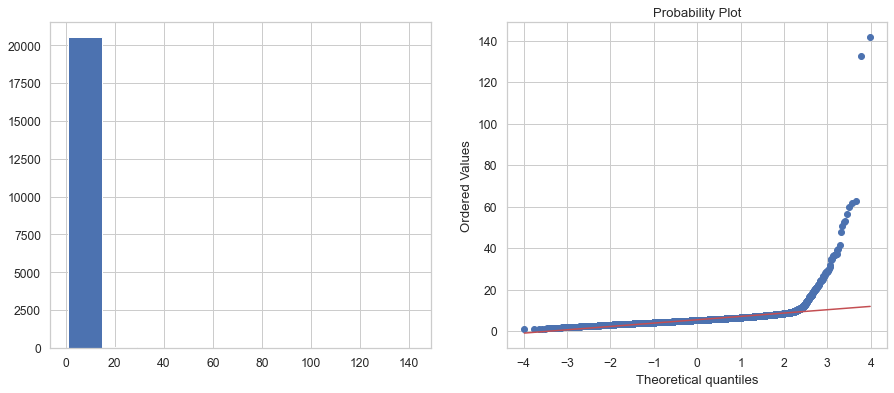

In [55]:
diagnostic_plots(housing, 'rooms_per_household')

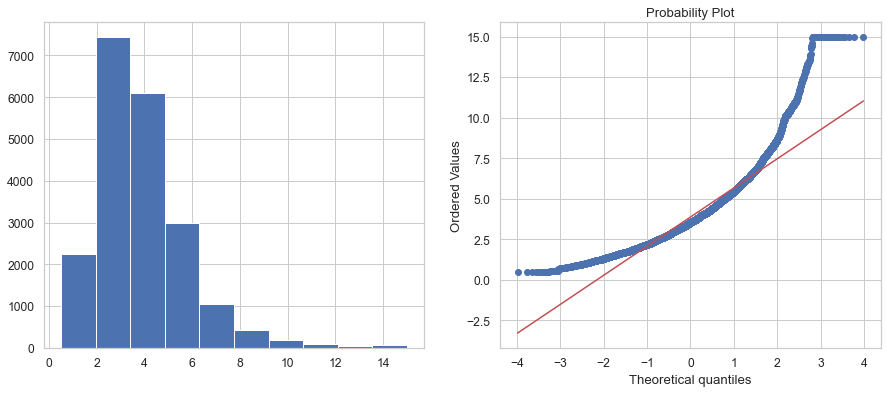

In [56]:
diagnostic_plots(housing, 'median_income')

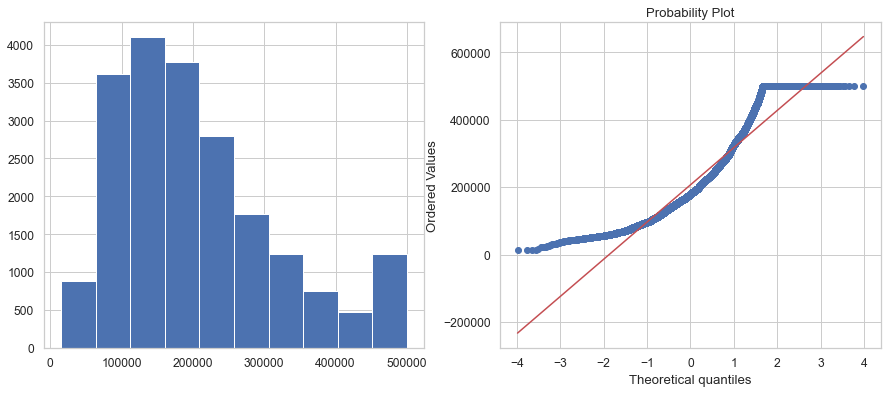

In [57]:
diagnostic_plots(housing, 'median_house_value')

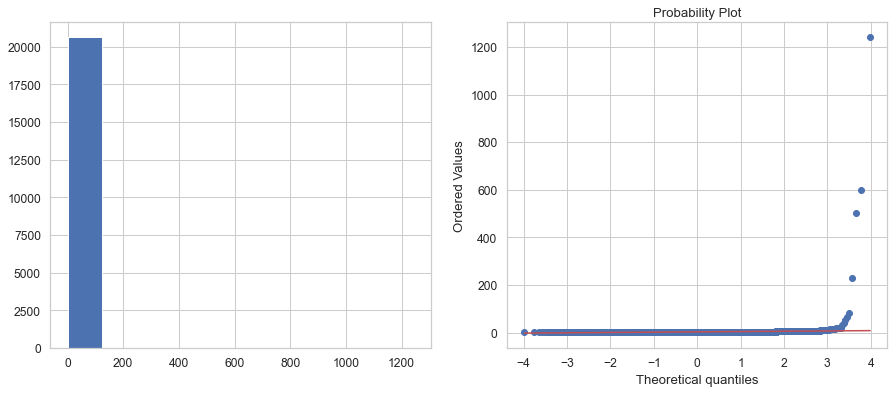

In [58]:
diagnostic_plots(housing, 'population_per_household')

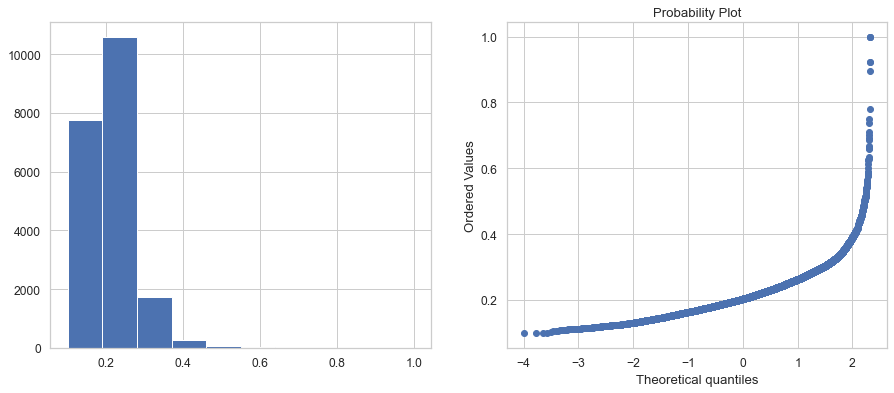

In [59]:
diagnostic_plots(housing, 'bedrooms_per_room')

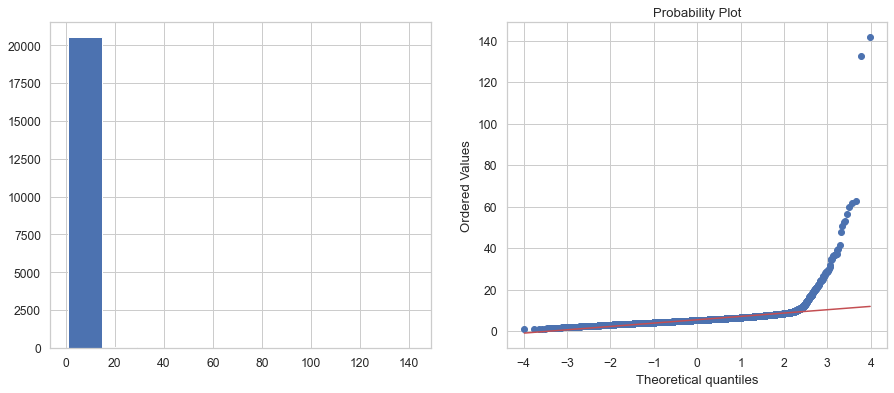

In [60]:
diagnostic_plots(housing, 'rooms_per_household')

#### Checking skewness value for each independent variable

In [61]:
housing1=housing.drop('ocean_proximity',axis=1)

longitude
-0.29777956498586855


<Figure size 14400x1440 with 0 Axes>

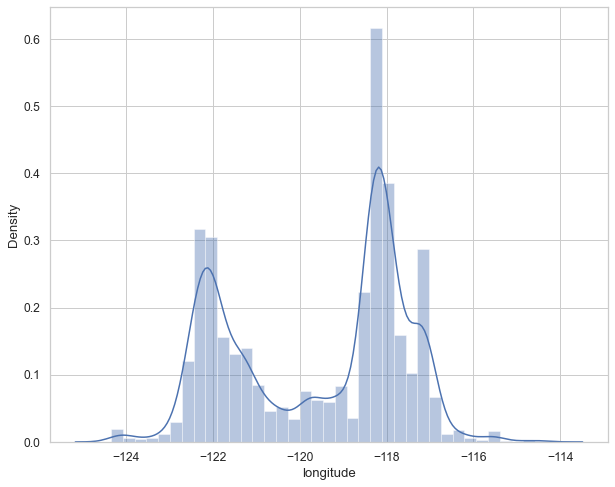

latitude
0.46591914016270397


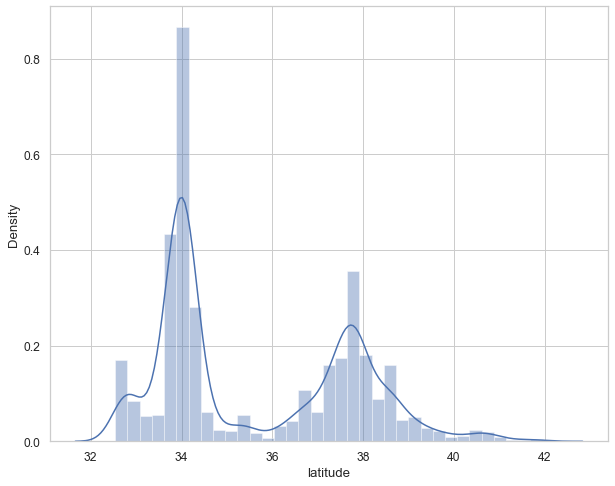

housing_median_age
0.06032625301661101


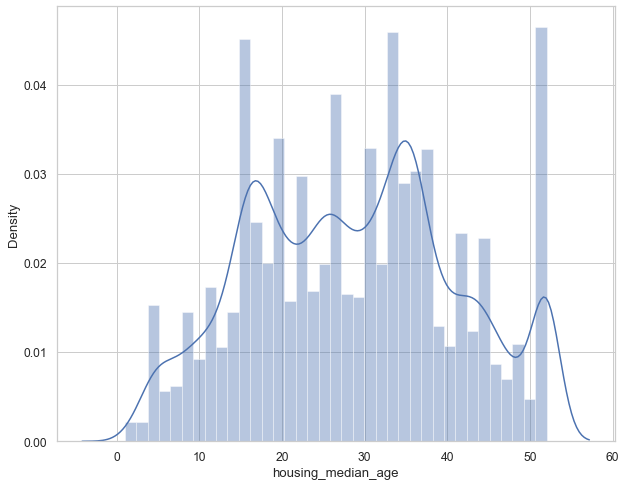

median_income
1.64653702990008


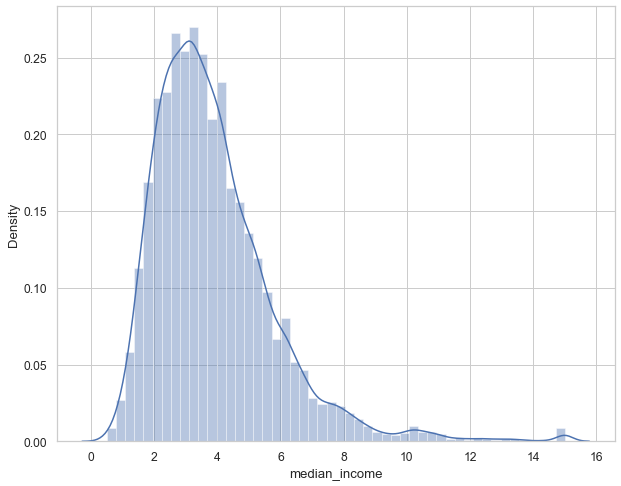

median_house_value
0.9776922140978416


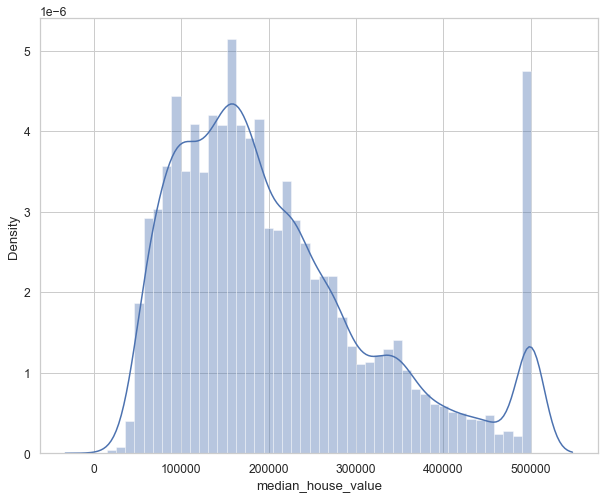

rooms_per_household
20.69636472075092


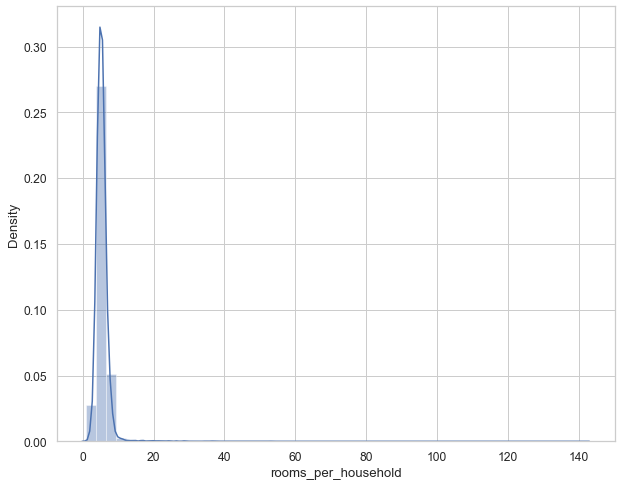

bedrooms_per_room
nan


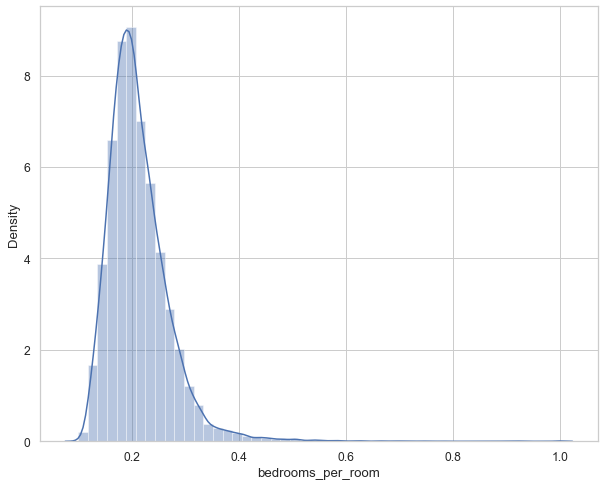

population_per_household
97.63246492211677


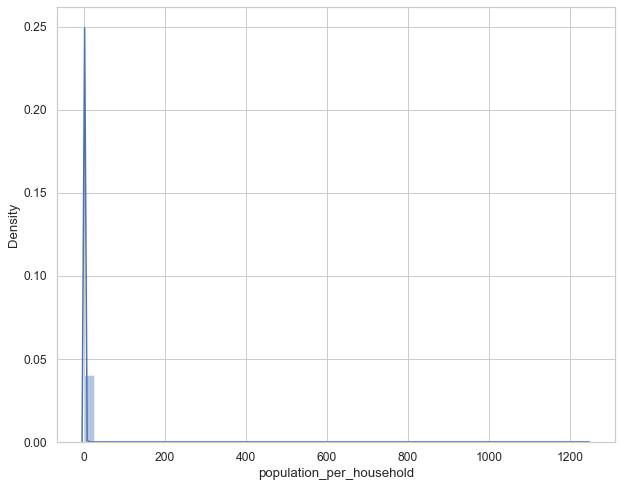

In [62]:
from scipy.stats import skew

plt.figure(figsize=(200,20)) 
for col in housing1:
        print(col)
        print(skew(housing1[col]))
        
        
        plt.figure()
        sns.distplot(housing1[col])
        plt.show()

##### Making the Curves more gaussain.To make all the curves in bell shape we will follow one of these methods: 
                                                                            
                                                                            1.Exponential Tanformation

                                                                            2.Logarithmic Transformation
                                                                            
                                                                            3.Reciprocal transformation
                                                                            
                                                                            4.Sqaure Root Tansformation
                                                                            
                                                                            5.Box-Cox Tansformation

♦  The transformation is done only if the correlation is less between the independent and target variable
 and also transformation is selected based on the readings inside that column.

In [63]:
housing1.corr()['median_house_value']

longitude                  -0.045967
latitude                   -0.144160
housing_median_age          0.105623
median_income               0.688075
median_house_value          1.000000
rooms_per_household         0.151948
bedrooms_per_room          -0.255880
population_per_household   -0.023737
Name: median_house_value, dtype: float64

I will use boxcox transformation for convertig all the features histogram into a bell shape curves

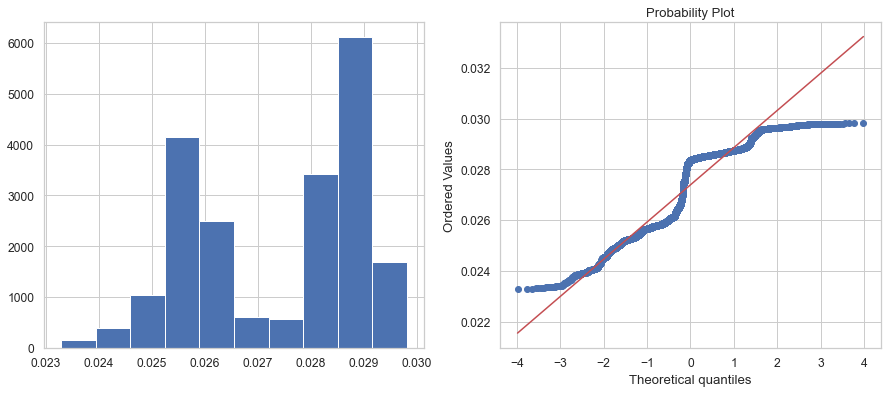

In [64]:
housing1['Rec_latitude']=1/(housing1['latitude']+1)
diagnostic_plots(housing1,'Rec_latitude')

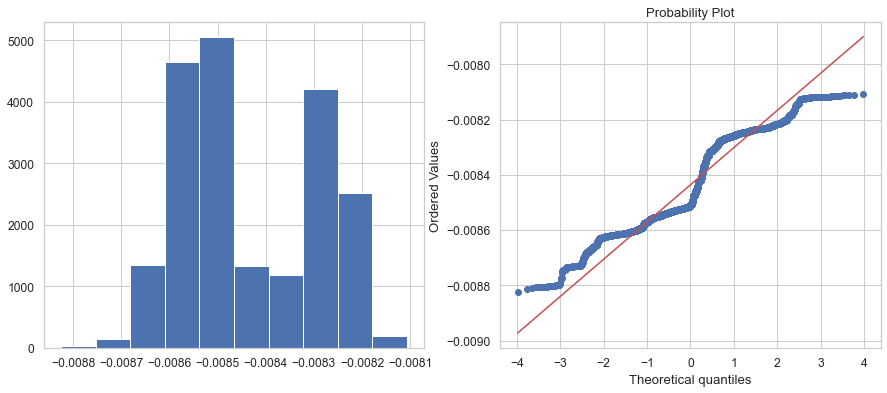

In [65]:
housing1['Rec_longitude']=1/(housing1['longitude']+1)
diagnostic_plots(housing1,'Rec_longitude')

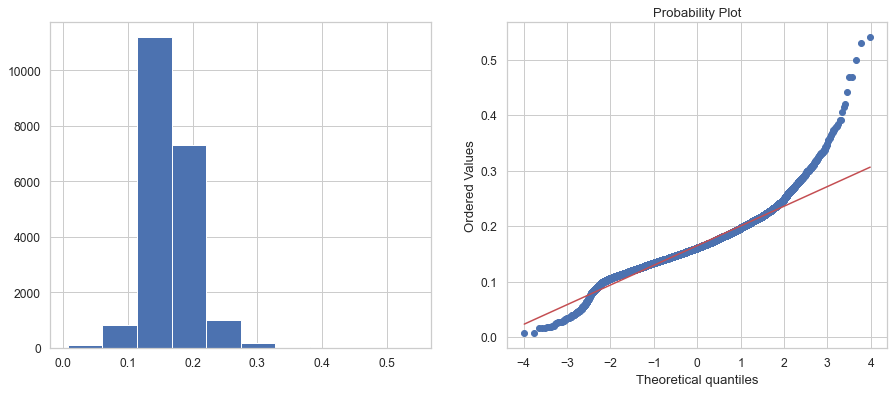

In [66]:
housing1['Rec_rooms_per_household']=1/(housing1['rooms_per_household']+1)
diagnostic_plots(housing1,'Rec_rooms_per_household')

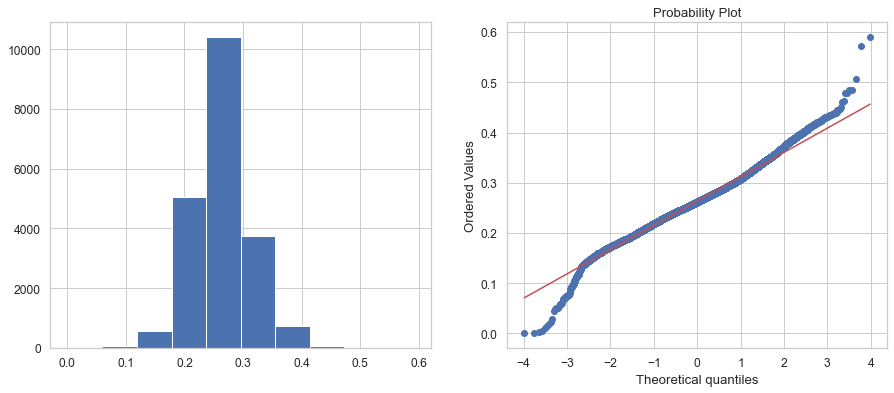

In [67]:
housing1['Rec_population_per_household']=1/(housing1['population_per_household']+1)
diagnostic_plots(housing1,'Rec_population_per_household')

In [68]:
housing1

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.025720,-0.008249,0.125249,0.281250
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.025733,-0.008249,0.138157,0.321560
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.025740,-0.008248,0.107664,0.263001
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.025740,-0.008247,0.146685,0.281853
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.025740,-0.008247,0.137328,0.314320
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,5.045455,0.224625,2.560606,0.024704,-0.008327,0.165414,0.280851
20636,-121.21,39.49,18.0,2.5568,77100.0,6.114035,0.215208,3.122807,0.024697,-0.008319,0.140567,0.242553
20637,-121.22,39.43,17.0,1.7000,92300.0,5.205543,0.215173,2.325635,0.024734,-0.008318,0.161146,0.300694
20638,-121.32,39.43,18.0,1.8672,84700.0,5.329513,0.219892,2.123209,0.024734,-0.008311,0.157990,0.320183


In [69]:
housing1=housing1.drop(columns=['longitude','latitude','population_per_household','rooms_per_household'])

In [70]:
housing1

,housing_median_age,median_income,median_house_value,bedrooms_per_room,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household
0,41.0,8.3252,452600.0,0.146591,0.025720,-0.008249,0.125249,0.281250
1,21.0,8.3014,358500.0,0.155797,0.025733,-0.008249,0.138157,0.321560
2,52.0,7.2574,352100.0,0.129516,0.025740,-0.008248,0.107664,0.263001
3,52.0,5.6431,341300.0,0.184458,0.025740,-0.008247,0.146685,0.281853
4,52.0,3.8462,342200.0,0.172096,0.025740,-0.008247,0.137328,0.314320
...,...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,0.224625,0.024704,-0.008327,0.165414,0.280851
20636,18.0,2.5568,77100.0,0.215208,0.024697,-0.008319,0.140567,0.242553
20637,17.0,1.7000,92300.0,0.215173,0.024734,-0.008318,0.161146,0.300694
20638,18.0,1.8672,84700.0,0.219892,0.024734,-0.008311,0.157990,0.320183


### Handling outliers in the data

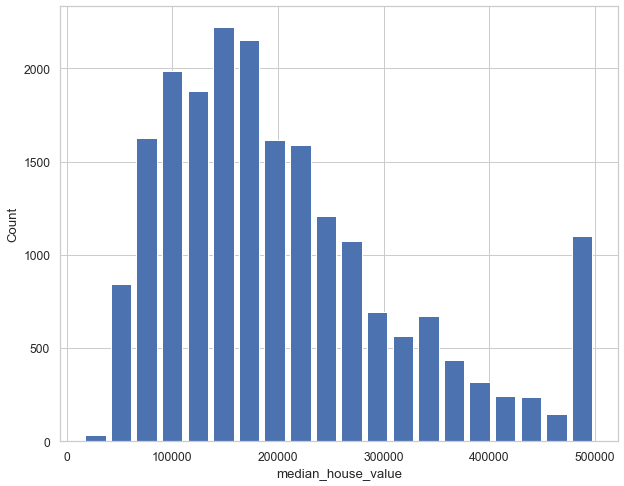

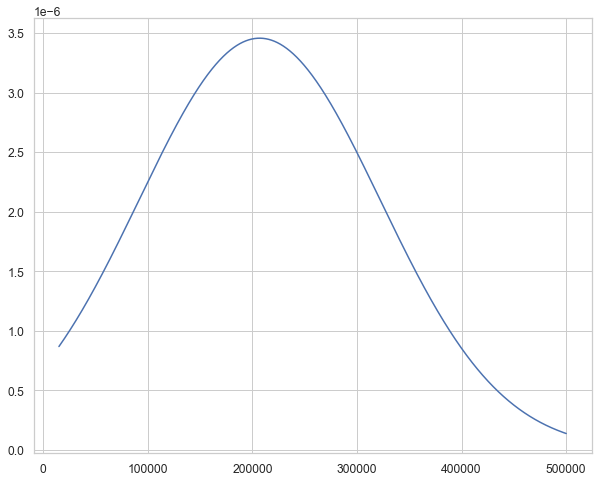

In [71]:
plt.hist(housing1.median_house_value, bins=20, rwidth=0.8)
plt.xlabel('median_house_value')
plt.ylabel('Count')
plt.show()

from scipy.stats import norm
import numpy as np

rng = np.arange(housing1.median_house_value.min(), housing1.median_house_value.max(), 0.1)
plt.plot(rng, norm.pdf(rng,housing1.median_house_value.mean(),housing1.median_house_value.std()))

#### Z score method of removing outliers

In [72]:
housing1['zscore'] = ( housing1.median_house_value - housing1.median_house_value.mean() ) / housing1.median_house_value.std()
housing1.head(5)

,housing_median_age,median_income,median_house_value,bedrooms_per_room,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household,zscore
0,41.0,8.3252,452600.0,0.146591,0.025720,-0.008249,0.125249,0.281250,2.129580
1,21.0,8.3014,358500.0,0.155797,0.025733,-0.008249,0.138157,0.321560,1.314124
2,52.0,7.2574,352100.0,0.129516,0.025740,-0.008248,0.107664,0.263001,1.258663
3,52.0,5.6431,341300.0,0.184458,0.025740,-0.008247,0.146685,0.281853,1.165072
4,52.0,3.8462,342200.0,0.172096,0.025740,-0.008247,0.137328,0.314320,1.172871


Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away

In [73]:
housing1[housing1['zscore']>3]

,housing_median_age,median_income,median_house_value,bedrooms_per_room,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household,zscore


In [74]:
housing1[housing1['zscore']<-3]

,housing_median_age,median_income,median_house_value,bedrooms_per_room,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household,zscore


So there are no outliers present in our dataset

In [75]:
housing1

,housing_median_age,median_income,median_house_value,bedrooms_per_room,Rec_latitude,Rec_longitude,Rec_rooms_per_household,Rec_population_per_household,zscore
0,41.0,8.3252,452600.0,0.146591,0.025720,-0.008249,0.125249,0.281250,2.129580
1,21.0,8.3014,358500.0,0.155797,0.025733,-0.008249,0.138157,0.321560,1.314124
2,52.0,7.2574,352100.0,0.129516,0.025740,-0.008248,0.107664,0.263001,1.258663
3,52.0,5.6431,341300.0,0.184458,0.025740,-0.008247,0.146685,0.281853,1.165072
4,52.0,3.8462,342200.0,0.172096,0.025740,-0.008247,0.137328,0.314320,1.172871
...,...,...,...,...,...,...,...,...,...
20635,25.0,1.5603,78100.0,0.224625,0.024704,-0.008327,0.165414,0.280851,-1.115777
20636,18.0,2.5568,77100.0,0.215208,0.024697,-0.008319,0.140567,0.242553,-1.124443
20637,17.0,1.7000,92300.0,0.215173,0.024734,-0.008318,0.161146,0.300694,-0.992722
20638,18.0,1.8672,84700.0,0.219892,0.024734,-0.008311,0.157990,0.320183,-1.058583


### Now lets deep dive into our main tasks

In [76]:
df=pd.read_csv('housing.csv')

In [77]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:>

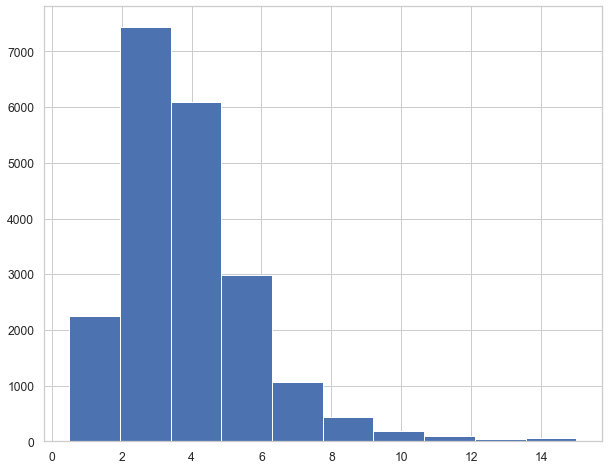

In [78]:
housing["median_income"].hist()

♦ Based on Median Income(as its highly correlated with our target,so based on this we create bins and give labels to it that is we are categorising in terms of median_income vale.

In [79]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [80]:
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

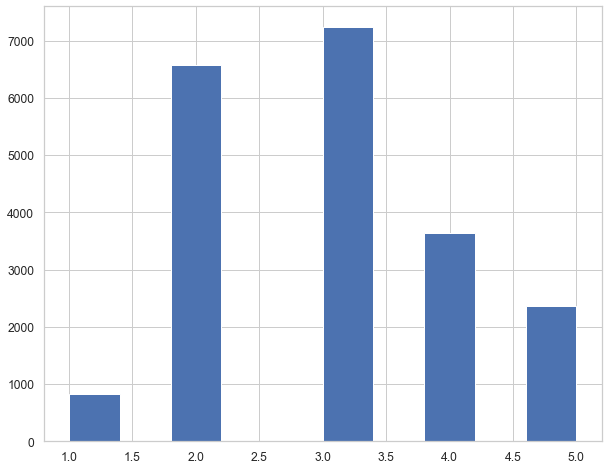

In [81]:
df["income_cat"].hist()

In [82]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


##### Splitting data into training and test sets using Stratified Sampling(using the new income-category atribute we created)
♦ To avoid creating too many strats, each stratum should be large enough. We will use the pd.cut() function to create an income category attribute with five categories.

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):      #we get the indexes split into test and train using stratification wrt income_cat attribute
    strat_train_set = df.loc[train_index]                                   #Using the indexes generated from the above generator we select all the reading using the respective indices split
    strat_test_set = df.loc[test_index]

In [84]:
 strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [85]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4


♦ Checking if we have stratified properly that is if same proportions of income category is there in test and our whole housing data

In [86]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [87]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [88]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Prepare the data for Machine Learning algorithms

In [89]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [90]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [91]:
housing_test= strat_test_set.drop("median_house_value", axis=1)
housing_test_labels = strat_test_set["median_house_value"].copy()

## Lets Create Custom Transformers for all the functions to be done on the Data frame

### Transformer To add Extra Attributes

(Eg. for population per household ,bedrooms per room etc )

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin


# column index

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self                # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attribs = attr_adder.transform(housing.values)

In [93]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [94]:
from sklearn.preprocessing import OneHotEncoder

### Now let's build a pipeline for preprocessing the numerical attributes

In [95]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [97]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [98]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [99]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [100]:
housing_prepared.shape

(16512, 16)

### Selecting and Training a model

### 1.Multiple (Linear) Regression 

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [102]:
# Training set evalvation

housing_predictions =lin_reg.predict(housing_prepared)
lin_reg_mse = mean_squared_error(housing_labels, housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)
lin_reg_rmse

68628.19819848923

In [103]:
# let's try the full preprocessing pipeline on the test-set

test_set1 =housing_test
test_set1_labels = housing_test_labels

test_data_prepared1 = full_pipeline.transform(test_set1)

test_data_pred1=lin_reg.predict(test_data_prepared1)



In [104]:

from sklearn.metrics import mean_squared_error


lin_mse = mean_squared_error(test_set1_labels, test_data_pred1)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66911.98070857546

In [105]:
from sklearn.metrics import r2_score
r2_score(test_set1_labels, test_data_pred1)

0.656435234728072

### 2.Ridge Regression:

In [106]:
from sklearn.linear_model import Ridge
 
# Train the model

ridgeReg = Ridge(alpha = 1)
ridgeReg.fit(housing_prepared, housing_labels)


Ridge(alpha=1)

In [107]:
# Training set evalvation

housing_predictions =ridgeReg.predict(housing_prepared)

ridgeReg_mse = mean_squared_error(housing_labels, housing_predictions)

ridgeReg_rmse = np.sqrt(ridgeReg_mse)

ridgeReg_rmse

68629.57436947316

In [108]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared2 = full_pipeline.transform(test_set)

test_data_pred2=ridgeReg.predict(test_data_prepared2)

In [109]:

from sklearn.metrics import mean_squared_error


ridge_mse = mean_squared_error(test_set_labels, test_data_pred2)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

66937.43327613281

In [110]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred2)

0.6561738086432143

### 3.Lasso Regression

In [111]:
from sklearn.linear_model import Lasso
 
# Train the model

lasso = Lasso(alpha = 1)
lasso.fit(housing_prepared, housing_labels)

Lasso(alpha=1)

In [112]:
# Training set evalvation

housing_predictions =lasso.predict(housing_prepared)

lasso_mse = mean_squared_error(housing_labels, housing_predictions)

lasso_rmse = np.sqrt(lasso_mse)

lasso_rmse

68628.25905309292

In [113]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared3 = full_pipeline.transform(test_set)

test_data_pred3=lasso.predict(test_data_prepared3)

In [114]:
from sklearn.metrics import mean_squared_error


lasso_mse = mean_squared_error(test_set_labels, test_data_pred3)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

66916.00794739972

In [115]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred3)

0.6563938771420414

### 4.Decison Tree regressor

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [117]:
# Training set evalvation

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###### It has overfitted the model completely

In [118]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared4 = full_pipeline.transform(test_set)

test_data_pred4=tree_reg.predict(test_data_prepared4)

In [119]:
from sklearn.metrics import mean_squared_error


dt_mse = mean_squared_error(test_set_labels, test_data_pred4)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

70388.94215505105

In [120]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred4)

0.6198020920511593

#### 5.Random-Forest Regressor

In [121]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [122]:
# Training set evalvation

housing_predictions = forest_reg.predict(housing_prepared)
forest_reg_mse = mean_squared_error(housing_labels, housing_predictions)
forest_reg_rmse = np.sqrt(forest_reg_mse)
forest_reg_rmse

18603.515021376355

In [123]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared5 = full_pipeline.transform(test_set)

test_data_pred5=forest_reg.predict(test_data_prepared5)

In [124]:
from sklearn.metrics import mean_squared_error


fr_mse = mean_squared_error(test_set_labels, test_data_pred5)
fr_rmse = np.sqrt(fr_mse)
fr_rmse

48306.37578563917

In [125]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred5)

0.8209353917276664

### 6.Support Vector regressor

In [126]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [127]:
# Training set evalvation

housing_predictions = svm_reg.predict(housing_prepared)
svm_reg_mse = mean_squared_error(housing_labels, housing_predictions)
svm_reg_rmse = np.sqrt(svm_reg_mse)
svm_reg_rmse

111094.6308539982

In [128]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared6 = full_pipeline.transform(test_set)

test_data_pred6=svm_reg.predict(test_data_prepared6)

In [129]:
from sklearn.metrics import mean_squared_error


svr_mse = mean_squared_error(test_set_labels, test_data_pred6)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

109510.43630639122

In [130]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred6)

0.07973720489759462

### 7.XGB Regressor

In [131]:
import xgboost as xg

In [132]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [133]:
xgb_r.fit(housing_prepared, housing_labels)
  

[09:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [134]:
# Training set evalvation

housing_predictions = xgb_r.predict(housing_prepared)
xgb_r_mse = mean_squared_error(housing_labels, housing_predictions)
xgb_r_rmse = np.sqrt(xgb_r_mse)
xgb_r_rmse

48230.32265056855

In [135]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared7 = full_pipeline.transform(test_set)

test_data_pred7=xgb_r.predict(test_data_prepared7)

In [136]:
from sklearn.metrics import mean_squared_error


xgb_r_mse = mean_squared_error(test_set_labels, test_data_pred7)
xgb_r_rmse = np.sqrt(xgb_r_mse)
xgb_r_rmse

51777.0318539007

In [137]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred7)

0.7942806481897243

#### Grid search CV for random forest(Hyper parameter Tuning)

In [138]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
      # try 12 (3×4) combinations of hyperparameters
  
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # then try 6 (2×3) combinations with bootstrap set as False
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Randomised Search Random Forest

In [139]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}
  

forest_reg = RandomForestRegressor(random_state=42)
  
# Instantiating RandomizedSearchCV object
forest_reg_cv = RandomizedSearchCV(forest_reg, param_dist, cv = 5)
  
forest_reg_cv.fit(housing_prepared, housing_labels)
  


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021681338070>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002168133D5E0>})

In [140]:
# Print the tuned parameters and score
print("Random-Forest  Parameters: {}".format(forest_reg_cv.best_params_))
print("Best score is {}".format(forest_reg_cv.best_score_))

Random-Forest  Parameters: {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
Best score is 0.8189670192897331


In [141]:
forest_reg_cv.best_estimator_

RandomForestRegressor(max_features=8, random_state=42)

♦ Let's look at the score of each hyperparameter combination tested during the randomised search

In [142]:
cvres = forest_reg_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 7}
nan {'max_depth': None, 'max_features': 2, 'min_samples_leaf': 7}
nan {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 7}
nan {'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}
nan {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3}
nan {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1}
nan {'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 8}
nan {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 5}
nan {'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 1}
nan {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}


In [143]:
final_model =  forest_reg_cv.best_estimator_
final_model

RandomForestRegressor(max_features=8, random_state=42)

In [144]:

# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared8 = full_pipeline.transform(test_set)

test_data_pred8=final_model.predict(test_data_prepared8)

In [145]:
from sklearn.metrics import mean_squared_error


final_model_mse = mean_squared_error(test_set_labels, test_data_pred8)
final_model_rmse = np.sqrt(final_model_mse)
final_model_rmse

47171.408004453646

In [146]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred8)

0.8292508599620304

#### Randomised Search XGBOOST

In [147]:
from scipy.stats import randint
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}
  

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Instantiating RandomizedSearchCV object
xgb_r_cv = RandomizedSearchCV(xgb_r, param_dist, cv = 5)
  
xgb_r_cv.fit(housing_prepared, housing_labels)

[09:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in la

[09:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in la

[09:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in la

[09:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[09:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in la

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=10, n_...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [148]:
xgb_r_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features=3, min_child_weight=1, min_samples_leaf=5,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [149]:
final_model_XG =  xgb_r_cv.best_estimator_
final_model_XG

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             max_features=3, min_child_weight=1, min_samples_leaf=5,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [150]:
# let's try the full preprocessing pipeline on the test-set

test_set =housing_test
test_set_labels = housing_test_labels

test_data_prepared9 = full_pipeline.transform(test_set)

test_data_pred9=final_model_XG.predict(test_data_prepared9)

In [151]:
from sklearn.metrics import mean_squared_error


final_model_XG_mse = mean_squared_error(test_set_labels, test_data_pred9)
final_model_XG_rmse = np.sqrt(final_model_XG_mse)
final_model_XG_rmse

51777.0318539007

In [152]:
from sklearn.metrics import r2_score
r2_score(test_set_labels, test_data_pred9)

0.7942806481897243

##### So best Model has been normalised searched Random forest regressor

In [153]:
from sklearn.ensemble import RandomForestRegressor

fo_reg = RandomForestRegressor(max_features=7, random_state=42)


In [154]:
from sklearn.impute import KNNImputer

In [155]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [156]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [167]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [157]:
housing=pd.get_dummies(housing)

In [158]:
imputer = KNNImputer(n_neighbors=2)

In [159]:
housing = imputer.fit_transform(housing)

In [164]:
housing

array([[-121.89,   37.29,   38.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.93,   37.05,   14.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.2 ,   32.77,   31.  , ...,    0.  ,    0.  ,    1.  ],
       ...,
       [-116.4 ,   34.09,    9.  , ...,    0.  ,    0.  ,    0.  ],
       [-118.01,   33.82,   31.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.45,   37.77,   52.  , ...,    0.  ,    1.  ,    0.  ]])

In [160]:
fo_reg.fit(housing,housing_labels)

RandomForestRegressor(max_features=7, random_state=42)

#### Create a Pickle file using serialization

In [161]:

import pickle
pickle_out = open("fo_reg.pkl","wb")
pickle.dump(fo_reg, pickle_out)
pickle_out.close()

In [165]:
prediction=fo_reg.predict([[-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1,0,0,0,0]])

In [166]:
prediction

array([263880.])